# Discounted Cash Flow Analysis and Net Present Value

Core issue: "time value of money", i.e. having assets now is better than receiving them in the future. A "project" can be modeled as a series of revenues and expenses to be realized over time. How should we value a times series of revenues and expenses?

The Net Present Value (NPV) is a standard metric for valuing a time series of revenues and expenses. Discounted Cash Flow Analysis (DCF) is a methodology for computing the NPV.


## Time Value of Money
Having an asset now is better than receiving it in the future, because we can employ the asset to useful ends (e.g. investing money or operating capital) in the meantime. Consider a contract which guarantees the payment of a cash amount $c_t$ at some time $t$ into the future. The "future value" of the contract is $c_t$. Its "present value" is:

$$PV = f(t) c_t$$

where $f(t)$ is the discount function. $f(t)$ is less than one and monotonically decreasing for all $t>0$.

A simple model of the discount function is investing at a constant interest rate. This interest rate $r$ is called the "discount rate". With the discount rate model

$$ f(t) = \frac{1}{(1 + r)^t} $$

and

$$ PV = \frac{c_t}{(1 + r)^t} $$

Note that the units of $r$ must be the inverse of the units of $t$.

### Example: Whether to Buy a Contract

> Suppose I have a contract which guarantees a payment of \$100 to the bearer six months from today. I offer to sell this contact to you for \$99. Suppose you also have access to a bank account which pays 5% APY interest (compounded continuously). Should you buy the contract from me for \$99?

At a 5% discount rate, the present value of the contract to you is:

In [1]:
c_t = 100; r = 0.05; t = 0.5
PV = c_t / (1 + r)**t
print PV

97.5900072949


The present value of \$97.59 is less than the sale price of \$99; you should not buy the contract. You would be better off putting the \$99 in the bank (this would yield \$101.44 in six months). 

## The DCF Model
Discounted cash flow analysis models the present value of a project to an organization. It models a project as a time series of cash flows: expenses required to set up and operate the project, and revenues from the sale of the resulting goods or services. These cash flows are paid/received by the organization's finances. The organization's finances are modeled as a single virtual account, which accrues interest at the discount rate $r$.

![Cash Flows](files/npv_figures/npv_cash_flow.png)

The model assumes that cash flows to/from the project occur at discrete time periods. 

Mathematically, the inputs to the DCF model are:
  #. The project lifetime, $T$ (number of time periods).
  #. A time series of cash flows over the project lifetime, ${c_t}_{t=0}^{T}$.
  #. The discount rate, $r$.

The DCF model makes the following assumptions:
  #. The time series of cash flows is deterministic and known in advance.
  #. Cash flow shortfalls in any time period are borrowed from the virtual account. Net positive cash flows are deposited into the virtual account.
  #. The organization can borrow arbitrary amounts from the virtual account.
  #. The interest rate for borrowing is fixed and is the same as for deposits. The interest rate is called the discount rate.

### Net Present Value
The economic value of the project is its net contribution to the virtual account. Because this contribution will be distributed over time, we must discount its present value. The net contribution over the project lifetime is equivalent to depositing (or withdrawing) some amount from the virtual account today; this amount is the Net Present Value (NPV) of the project.

Imagine that we could choose either to undertake the project, or to not undertake the project and instead change the balance of the virtual account by the NPV today. With either choice, the balance in the virtual account after $T$ periods will be identical.

A project is economically worthwhile if the NPV is positive. In fact, if we can really borrow arbitrary amounts of money at the discount rate, we should finance every possible project with a positive NPV! On the other hand, if we are presented with a set of mutually exculsive projects, we should choose to carry out the project with the highest NPV.

The net present value is the sum of the present values of each period's cash flow:

$$ NPV = \sum_{t=0}^{T} PV(c_t, t) = \sum_{t=0}^{T} f(t) c_t =\sum_{t=0}^{T} \frac{c_t}{(1 + r)^t} $$


### Example: Comparing two Factory Construction Options
Suppose we have two options for constructing a new widget factory. In Plan A, we spend 4 years setting up state-of-the-art widget presses, and then sell off the factory in year 4 for \$650M. In Plan B, we set up a quick operation in temporary buildings, run it at a profit for 4 years, and then pay a large decommissioning cost in year 5 after the factory has worn out. The table below lists the cash flow projections (in $ millions):

| Year  | 0 | 1 | 2 | 3 | 4 | 5 |
| ---   | --- | --- | --- | --- | --- | --- |
| Plan A | -170 | -100 | -100 | -100 | 625 |  |
| Plan B | -260 | 200 | 200 | 100 | 50 | -310 |

The following code plots the future and present values of each plan, with a discount rate of 10%:


<IPython.core.display.Javascript object>


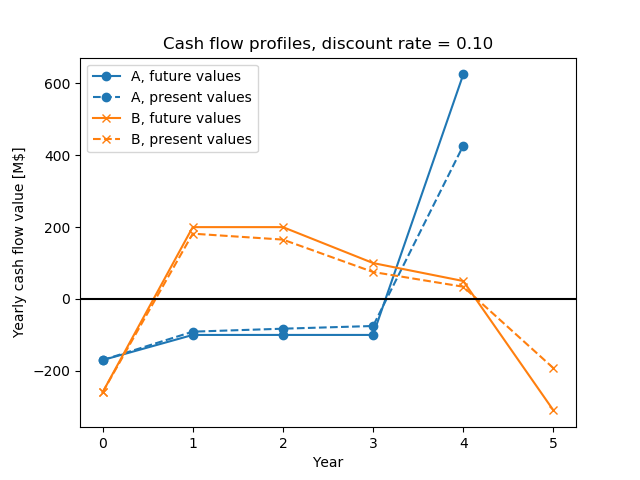

Text(0.5,1,'Cash flow profiles, discount rate = 0.10')

In [8]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
r = 0.10
cashflow_a = np.array([-170, -100, -100, -100, 625])
cashflow_b = np.array([-260, 200, 200, 100, 50, -310])

pvs_a = np.array([cashflow_a[t] / (1 + r)**t for t in range(5)])
pvs_b = np.array([cashflow_b[t] / (1 + r)**t for t in range(6)])

plt.plot(cashflow_a, color='C0', marker='o', label='A, future values')
plt.plot(pvs_a, color='C0', marker='o', linestyle='--', label='A, present values')

plt.plot(cashflow_b, color='C1', marker='x', label='B, future values')
plt.plot(pvs_b, color='C1', marker='x', linestyle='--', label='B, present values')

plt.axhline(y=0, color='black')
plt.xlabel('Year')
plt.ylabel('Yearly cash flow value [M$]')
plt.legend()
plt.title('Cash flow profiles, discount rate = {:.2f}'.format(r))


In [3]:
npv_a = np.npv(r, cashflow_a)
npv_b = np.npv(r, cashflow_b)
print 'NPV of plan A = {:.1f} $M'.format(npv_a)
print 'NPV of plan B = {:.1f} $M'.format(npv_b)

NPV of plan A = 8.2 $M
NPV of plan B = 3.9 $M


At the discount rate of 10%, Plan A has the higher NPV, and is the preferred choice.

## Dependence of the NPV on Discount Rate
The NPV depends on the discount rate. For a 'typical' development project with upfront costs and later payoffs (e.g. Plan A), the relationship is straightforward: the NPV decreases with increasing discount rate. Higher discount rates decrease the present value of the eventual payoff, but have less effect on the near-term development costs.

Projects with multiple cash flow sign changes (e.g. Plan B) can have more a complicated dependence of NPV on discount rate. Plan B, for example, has positive NPV only for $r \in (0.07, 0.23)$. If the NPV is too low, the value of the project is swamped by the high decommissioning cost.


<IPython.core.display.Javascript object>


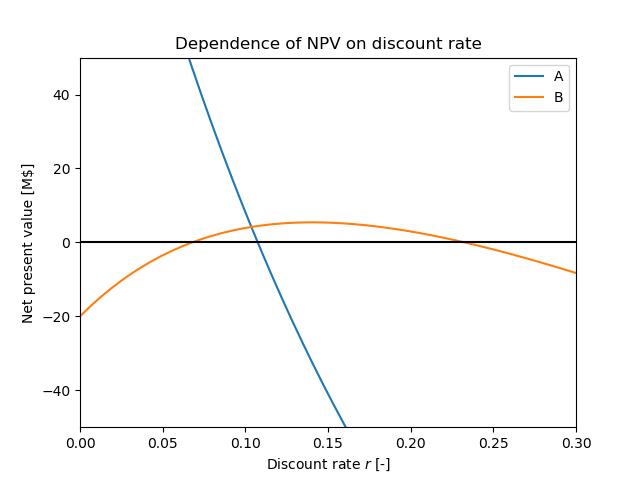

In [9]:
r = np.linspace(0, 0.30)
npv_a = [np.npv(r_, cashflow_a) for r_ in r]
npv_b = [np.npv(r_, cashflow_b) for r_ in r]

plt.figure()
plt.plot(r, npv_a, color='C0', label='A')
plt.plot(r, npv_b, color='C1', label='B')

plt.xlabel('Discount rate $r$ [-]')
plt.ylabel('Net present value [M$]')
plt.axhline(y=0, color='black')
plt.title('Dependence of NPV on discount rate')
plt.ylim([-50, 50])
plt.xlim([0, 0.3])
plt.legend()


## Internal Rate of Return
The value of a project can also be measured by its Internal Rate of Return (IRR). The IRR is the highest discount rate at which a project has positive NPV. However, it is not exactly the rate of return of an investment in the project. Generally, NPV is a better metric than IRR, and NPV should be used to compare the relative value of alternative projects.

## Choosing the Discount Rate
Because the discount rate has a large effect on the NPV, it is important to choose the discount rate properly. Typically, the CFO of a company will set a standard discount rate for all analysts to use in assessing new projects (the OMB does likewise for the US gov't).

The discount rate should reflect the firm's cost of capital. Suppose a firm is financed 25% by bank loans at 6% interest, and 75% by shareholders who expect a 10% annual dividend. Thus, the firm's weighted average cost of capital is

$$ 0.25 \times 6\% + 0.75 \times 10\%  = 9\%$$

In general investors who are at higher risk in case of bankruptcy (e.g. owners) demand higher rates of return than investors who are at less risk (e.g. bank). If a project is perceived as risky, investors will demand higher interest rates, and the cost of capital and the discount rate will be higher.

For commercial aircraft programs, discount rates are typically 12-20% [ [16.885 notes](https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-885j-aircraft-systems-engineering-fall-2004/lecture-notes/pres_willcox.pdf). ]

## Limitations

Our assumption that the cash flow is deterministic and known is too bold - there are many uncertainties at the outset of a project. Thus, the NPV should be thought of as a random variable, and we should seek to estimate its distribution for a given project...